In [53]:
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np

### Тесты
1) Биномиальный тест
   сравнение долей бинарных переменных.
2) Тест хи-квадрат + G-тест
   проверка независимости бинарных переменных.
3) Тест Мак-Немара
   сравнение бинарных переменных при зависимых измерениях.
4) Точный тест Фишера
   независимость групп на основе малого количества наблюдений
   (асимптотики для хи-квадрат и G-теста не выполняются).
5) Q-критерий Кохрена
   проверка влияния двух или более воздействий на группы,
   если отклик – бинарная переменная.
6) Коэффициент корреляции фи
   коэффициент связи между категориальными переменными.
   Позволяет, например, оценить, случайно ли кто-то даёт ответ,
   или же его ответы связаны с истинными.

# Задача 1. Проверка эффективности рекламы.
Фирма рассылает рекламные каталоги возможным заказчикам. По данным аналитиков, вероятность того, что организация получившая каталог, закажет рекламируемое изделие, равна 0,08.

Фирма разослала 1000 каталогов новой, улучшенной, формы и получила 100 заказов. Выяснить на уровне значимости 0.05, можно ли утверждать, что обновлённая форма существенно лучше прежней.

## Критерий
Рассмотрим количество заказов как биномиальную случайную величину, где успех - это заказ товара, а неудача - отсутствие заказа.

Используем биномиальный тест, поскольку он позволяет оценить отклонение эмпирических результатов от нулевой гипотезы.

$p_{old} = 0.08$ - вероятность заказа с использованием старой формы \
$p_{new}$ - вероятность заказа с использованием новой формы

$H_0: p_{old} = p_{new}$ \
$H_1: p_{old} < p_{new}$


In [54]:
alpha = 0.05
n_sent = 1000   # Число отправленных каталогов
n_orders = 100  # Число заказов
p_old = 0.08

h0_dist = st.binom(n = n_sent, p = p_old)

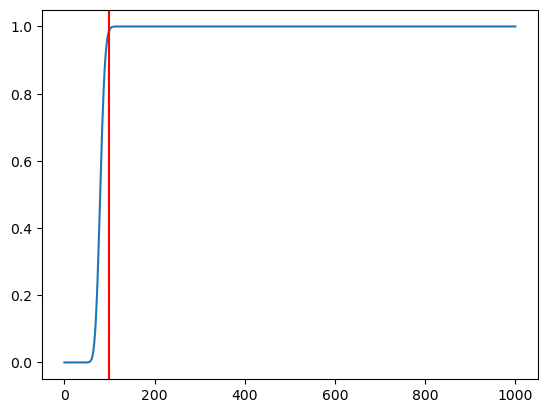

In [55]:
# plot
x = [i for i in range(n_sent + 1)]
y = [h0_dist.cdf(i) for i in x]

plt.plot(x, y)
plt.axvline(n_orders, c='red')
plt.show()

In [56]:
# p-value
p_val = 1 - h0_dist.cdf(n_orders)
print(f"p-value: {p_val:.4f}")

if p_val < alpha:
    print("p-value меньше заданного уровня значимости. "
          "Отвергаем нулевую гипотезу.")
else:
    print("Принимаем нулевую гипотезу гипотезу.")

p-value: 0.0101
p-value меньше заданного уровня значимости. Отвергаем нулевую гипотезу.


Вероятность отвергнуть верную гипотезу $H_0$ ниже уровня значимости, отвергнем её.

# Задача 2. Сравнение стилей интервью

Предположим, мы исследуем влияние стиля интервьюера (мы выделили 3 стиля - резкий, формальный и дружелюбный) на число респондентов, которые согласятся дать ответы на личные вопросы в очном опросе. У нас было 300 респондентов, которые были равномерно разделены на 3 группы. В итоге в первой группе согласилось ответить 45 человек, во второй - 80, а в третьей - 69. Что можно сказать о влиянии стиля на расположенность респондентов к ответу?


## Выбор критерия

Выберем Тест $\chi^2$ поскольку он может обрабатывать независимые выборки и подходит для анализа связи между категориальными переменными.

$H_0$ - стиль интервьюера **не влияет** на расположенность респондентов \
$H_1$ - стиль интервьюера **влияет** на расположенность респондентов

In [57]:
people = 300
groups = 3
group_size = people / groups

tested = [45, 80, 69]
mean = np.mean(tested)
expected = [mean] * groups

chi2, p_val = st.chisquare(tested, expected)

print(f"Chi2: {chi2}")
print(f"p-value: {p_val}")


Chi2: 9.90721649484536
p-value: 0.007057896292672348


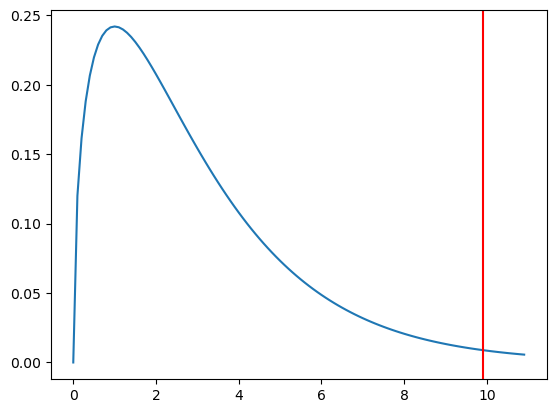

In [63]:
x = [i for i in np.arange(0, 11, 0.1)]
y = [st.chi2.pdf(i, df=3) for i in x]

plt.plot(x, y)
plt.axvline(chi2, c='red')
plt.show()

p-value вышел очень маленьким ($<1\%$), отвергнем гипотезу $H_0$, т.е. сделаем вывод о том, что стиль интервью **влияет** на решение.

# Задача 3. Выявление экстрасенсорики.
Предположим, что к нам пришёл человек и утверждает, что может на основе
предмета, принадлежащего кому-либо, определить, является ли данный
человек преступником. Мы провели строго контролируемый
рандомизированный эксперимент, после чего выяснилось следующее:

* Когда предмет принадлежал преступнику, человек определил это верно в
  7 случаях и неверно в 5
* Когда предмет принадлежал НЕ преступнику,
  человек определил это верно в 40 случаях и неверно в 31

Что мы можем сказать о его экстрасенсорных способностях?

## Выбор критерия

Наши данные, в одной из тестируемых групп (виновные) мы обладаем очень небольшим количеством данных, поэтому нам стоит взять тест Фишера для определения правдивости гипотезы.

|            | Верно | Не верно |
|------------|-------|----------|
| Виновен    | 7     | 5        |
| Не виновен | 40    | 31       |

$H_0$ - Правильность вывода экстрасенса не зависит от виновности человека.

In [59]:
table_extra = np.array([[7 , 5 ],
                        [40, 31]])

p_val = st.fisher_exact(table_extra, alternative="greater").pvalue

print(f"p-value: {p_val}")

p-value: 0.5772108340620568


Получили очень большое значение для p-value.
Мы не можем отвергнуть гипотезу $H_0$ - следовательно человек экстрасенсорными способностями не обладает $% :($

# Задача 4. Проверка связи на основе малых данных.
Предположим, мы хотим знать, связан ли пол с предпочтениями
политической партии. Мы берем простую случайную выборку из 25
избирателей и опрашиваем их об их предпочтениях в отношении
политических партий. В следующей таблице представлены результаты
опроса:

|        | Democrat | Republican | Total |
|--------|----------|------------|-------|
| Male   | 4        | 9          | 13    |
| Female | 8        | 4          | 12    |
| Total  | 12       | 13         | 25    |

Необходимо проверить, связан ли пол с предпочтениями или нет.

## Выбор критерия

Снова мы имеем дело с небольшим объёмом данных, поэтому обратимся к точному тесту Фишера.

$H_0$ - пол никак не влияет на выбор политической партии


In [60]:
table_poll = np.array([[4, 9],
                       [8, 4]])

p_val = st.fisher_exact(table_poll, alternative='less').pvalue

print(f"p-value: {p_val}")

p-value: 0.08117800896102147


Мы получили небольшое значение p-value, но оно всё ещё больше уровня значимости так что мы не можем отвергнуть нулевую гипотезу